### <font color='blue'>Previsão de Valor Futuro de Ações</font>

##### **Demanda:**

O objetivo principal é desenvolver um modelo de machine learning capaz de analisar dados históricos de uma ação e, com base nessas informações, fazer previsões sobre seu valor futuro em um determinado período.

##### **Descrição do Projeto**

**1. Coleta de Dados:** Utilizaremos a API do Yahoo Finance para obter os dados históricos da ação que desejamos prever.<br>
**2. Pré-processamento dos Dados:** Os dados brutos obtidos serão processados e preparados para serem alimentados ao modelo Prophet.<br>
**3. Construção do Modelo:** Utilizaremos a biblioteca Prophet para construir nosso modelo de previsão com base nos dados históricos.<br>
**4. Treinamento do Modelo:** O modelo será treinado com os dados históricos para aprender os padrões e tendências presentes nos dados.<br>
**5. Previsão do Valor Futuro:** Finalmente, faremos previsões do valor futuro da ação com base no modelo treinado.<br>

##### 1) **Instalando e Carregando as Bibliotecas**

In [13]:
#! pip install prophet

In [14]:
import yfinance as yf
from prophet import Prophet
from prophet.plot import plot_plotly

##### **Carregando os Dados Históricos**

In [15]:
# Vamos usar como referência o código da Ação Petrobras (PETR4.SA)
ticker = input("Digite o código da ação desejada: ")
dados = yf.Ticker(ticker).history("2y")

Digite o código da ação desejada:  PETR4.SA


In [28]:
dados.shape

(502, 7)

In [29]:
# A coluna Date - esta como indice precisa mudar 
dados.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-09-20 00:00:00-03:00,19.980571,20.095036,19.611738,19.770718,67798200,0.0,0.0
2022-09-21 00:00:00-03:00,19.936056,20.012366,19.643533,19.821590,58812200,0.0,0.0
2022-09-22 00:00:00-03:00,20.018724,20.400276,19.732561,20.311247,69764300,0.0,0.0
2022-09-23 00:00:00-03:00,19.916979,19.961493,18.931305,19.039412,138630800,0.0,0.0
2022-09-26 00:00:00-03:00,18.899506,19.128438,18.613344,18.626062,42934600,0.0,0.0


##### **Gráfico da Variação do Período Histórico**

<Axes: xlabel='Date'>

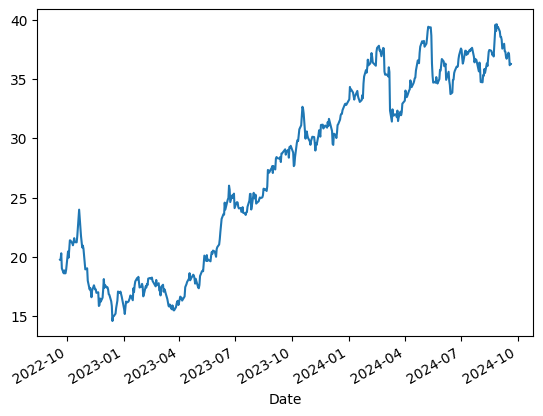

In [30]:
dados.Close.plot()

##### 2) **Preparando os Dados de Treinamento**

In [31]:
# Mudar o indice da tabela, tirar Date e colocar o indice padrão
treinamento = dados.reset_index()

In [32]:
# Retirando o timezone (fuso horário) da coluna data
treinamento["Date"] = treinamento["Date"].dt.tz_localize(None)

In [33]:
# Selecionando as colunas de data e valor de fechamento
treinamento = treinamento[["Date","Close"]]

In [34]:
# Renomeando as colunas (o Prophet precisa receber os dados com esse padrão)
treinamento.columns = ["ds", "y"]

##### 3) **Criação do Modelo de Machine Learning**

In [35]:
modelo = Prophet()

##### 4) **Treinamento do Modelo Machine Learning**

In [36]:
modelo.fit(treinamento)

02:35:55 - cmdstanpy - INFO - Chain [1] start processing
02:35:55 - cmdstanpy - INFO - Chain [1] done processing


##### **Gerando Datas Futuras**

In [37]:
# especificando o período das previsões (em dias)
periodo = modelo.make_future_dataframe(periods=90)

##### **Gerando as Previsões**

In [38]:
previsoes = modelo.predict(periodo)
previsoes.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-09-20,19.551390,18.617799,20.918729,19.551390,19.551390,0.197643,0.197643,0.197643,-0.028268,-0.028268,-0.028268,0.225911,0.225911,0.225911,0.0,0.0,0.0,19.749033
1,2022-09-21,19.529458,18.480029,20.704449,19.529458,19.529458,0.081374,0.081374,0.081374,-0.055032,-0.055032,-0.055032,0.136406,0.136406,0.136406,0.0,0.0,0.0,19.610832
2,2022-09-22,19.507525,18.377440,20.730404,19.507525,19.507525,0.055168,0.055168,0.055168,-0.012116,-0.012116,-0.012116,0.067285,0.067285,0.067285,0.0,0.0,0.0,19.562693
3,2022-09-23,19.485592,18.326783,20.642607,19.485592,19.485592,-0.046389,-0.046389,-0.046389,-0.066667,-0.066667,-0.066667,0.020277,0.020277,0.020277,0.0,0.0,0.0,19.439203
4,2022-09-26,19.419793,18.264691,20.552926,19.419793,19.419793,0.003288,0.003288,0.003288,-0.018922,-0.018922,-0.018922,0.022210,0.022210,0.022210,0.0,0.0,0.0,19.423081


##### 5) **Visualizando as Previsões**

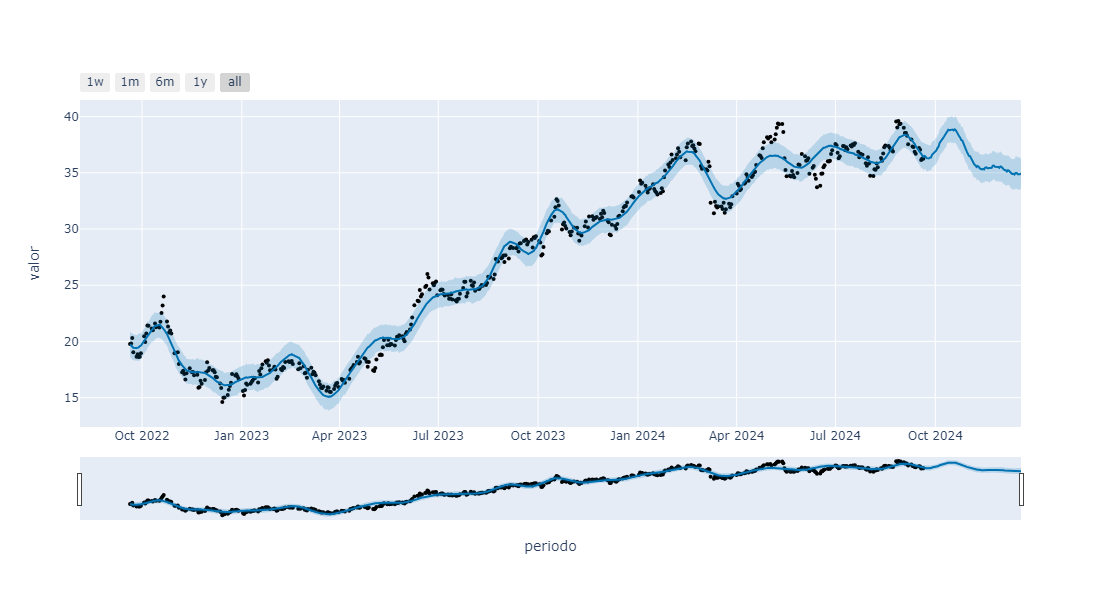

In [39]:
plot_plotly(modelo, previsoes, xlabel = "periodo", ylabel = "valor")